In [1]:
import os
import pandas as pd
import numpy as np
import time

In [2]:
df=pd.read_csv(r'data/AURN_data_download/Westminster/MY1.csv',parse_dates=['date'],index_col='date')

In [3]:
df

,O3,NO,NO2,NOXasNO2,SO2,CO,PM10,NV10,V10,PM2.5,...,AP10,AT2.5,AP2.5,site,code,latitude,longitude,location_type,Ox,NOx
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,1.72961,78.38595,45.77784,165.96796,4.75424,NaN,69.0,60.0,9.0,58.1,...,1026.2,4.7,1025.2,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.960024,83.832703
2020-01-01 01:00:00,1.92918,88.61587,52.64325,188.51903,4.84394,0.397528,45.0,38.4,6.6,43.2,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,27.524407,95.223555
2020-01-01 02:00:00,1.99570,70.02935,44.76870,152.14554,3.09474,0.346417,46.2,39.1,7.1,43.0,...,1026.2,4.9,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,23.579103,76.850791
2020-01-01 03:00:00,2.04559,67.58589,40.20699,143.83725,2.96019,0.335059,45.1,38.8,6.3,42.8,...,1026.2,4.6,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,21.299094,72.654172
2020-01-01 04:00:00,2.99355,72.03298,47.26010,157.70912,3.83478,0.349257,40.8,34.2,6.6,36.8,...,1026.2,4.2,1024.1,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.320553,79.661030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,20.70539,12.46950,30.47461,49.59424,1.12164,0.129904,13.9,11.8,2.1,11.7,...,1002.9,-0.1,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.415693,25.050618
2020-12-31 20:00:00,24.14797,9.65279,26.51175,41.31249,1.12164,0.094180,14.6,11.3,3.3,11.0,...,1002.9,0.6,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,25.080442,20.867401
2020-12-31 21:00:00,25.69464,12.46950,28.45232,47.57196,1.36199,0.087685,16.6,13.0,3.6,15.3,...,1003.9,0.8,1001.9,London Marylebone Road,MY1,51.52253,-0.154611,Urban Traffic,26.809326,24.029142


In [4]:
era=pd.read_csv(r'data/era5_data/MY1_era.csv',parse_dates=['date'],index_col='date')

In [5]:
era

,u10,v10,d2m,t2m,blh,sp,ssrd,tcc,tp,rh2m,lat,lon
date,,,,,,,,,,,,
2020-01-01 00:00:00,-2.720528,1.545010,277.183465,278.394725,384.209053,102252.303312,-1.164153e-10,0.650958,0.000008,91.884130,51.52253,-0.154611
2020-01-01 01:00:00,-2.308789,1.282742,276.695430,277.772899,353.220263,102211.168636,-1.164153e-10,0.603699,0.000002,92.715877,51.52253,-0.154611
2020-01-01 02:00:00,-2.216471,0.758730,276.505662,277.463419,255.911846,102174.855967,-1.164153e-10,0.710378,0.000005,93.485560,51.52253,-0.154611
2020-01-01 03:00:00,-1.928623,0.509013,276.412816,277.305813,191.375560,102166.786485,-1.164153e-10,0.837765,0.000005,93.906363,51.52253,-0.154611
2020-01-01 04:00:00,-1.700043,0.607069,276.553051,277.478941,151.780210,102142.578039,-1.164153e-10,0.819103,0.000003,93.696878,51.52253,-0.154611
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,1.380939,-1.945195,272.197565,273.557442,476.945688,99902.506413,-5.820766e-11,0.918149,0.000000,90.582979,51.52253,-0.154611
2020-12-31 20:00:00,0.987925,-2.102732,272.171041,273.629146,486.665851,99947.625909,-5.820766e-11,0.839639,0.000000,89.939908,51.52253,-0.154611
2020-12-31 21:00:00,0.681543,-1.933668,272.087408,273.470592,489.355002,100000.215520,-5.820766e-11,0.739354,0.000000,90.422188,51.52253,-0.154611


In [6]:
df1=pd.concat([df,era],axis=1)

# AutoML-based weather normalisation

In [7]:
import normet.autodew as ad

In [8]:
df1a=ad.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [9]:
automl=ad.train_model(df1a,value='value',variables=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']);

2024-06-25 14:01:08 : Training AutoML...
2024-06-25 14:02:09 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}


In [10]:
best_model = automl.best_estimator
best_config = automl.best_config
print("Best model:", best_model)
print("Best model parameters:", best_config)


Best model: xgboost
Best model parameters: {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}


In [11]:
automl.best_result

{'pred_time': 3.279851570289005e-06,
 'wall_clock_time': 48.97695994377136,
 'metric_for_logging': {'pred_time': 3.279851570289005e-06},
 'val_loss': 0.14506105728824534,
 'training_iteration': 1,
 'config': {'n_estimators': 80,
  'max_leaves': 179,
  'min_child_weight': 0.03469842703470486,
  'learning_rate': 0.09050333780681966,
  'subsample': 0.8788794424065157,
  'colsample_bylevel': 0.7372635897769984,
  'colsample_bytree': 0.9535003009271207,
  'reg_alpha': 0.09353166342028453,
  'reg_lambda': 3.6044671382295674},
 'config/n_estimators': 80,
 'config/max_leaves': 179,
 'config/min_child_weight': 0.03469842703470486,
 'config/learning_rate': 0.09050333780681966,
 'config/subsample': 0.8788794424065157,
 'config/colsample_bylevel': 0.7372635897769984,
 'config/colsample_bytree': 0.9535003009271207,
 'config/reg_alpha': 0.09353166342028453,
 'config/reg_lambda': 3.6044671382295674,
 'experiment_tag': 'exp',
 'time_total_s': 5.785110950469971}

In [12]:
automl.feature_importances_

array([0.0512452 , 0.09356024, 0.05020848, 0.07993569, 0.0396647 ,
       0.21618505, 0.05815253, 0.02513707, 0.02636059, 0.03911485,
       0.02288253, 0.1130693 , 0.15781933, 0.02666452], dtype=float32)

In [13]:
automl.feature_names_in_

array(['weekday', 'u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc',
       'tp', 'rh2m', 'date_unix', 'day_julian', 'hour'], dtype='<U10')

In [14]:
mod_stats=(pd.concat([ad.modStats(df1a,automl,set='testing'),
                ad.modStats(df1a,automl,set='training'),
                ad.modStats(df1a.assign(set="all"),automl,set='all')]))

In [15]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,1593,0.912116,0.065145,1.948816,0.007081,0.211829,2.796755,0.936845,***,0.645061,0.822530,0.877679,testing
0,4780,0.971967,-0.013397,0.655479,-0.001470,0.071933,0.868739,0.994758,***,0.880270,0.940135,0.989543,training
0,6373,0.957006,0.006235,0.978762,0.000683,0.107153,1.587833,0.981282,***,0.821371,0.910685,0.962915,all


In [16]:
df1a

,rowid,u10,sp,ssrd,value,date,blh,t2m,rh2m,v10,d2m,tcc,tp,date_unix,day_julian,weekday,hour,set
0,0,-2.720528,102252.303312,-1.164153e-10,58.1,2020-01-01 00:00:00,384.209053,278.394725,91.884130,1.545010,277.183465,0.650958,0.000008,1.577837e+09,1,3,0,training
1,1,-2.308789,102211.168636,-1.164153e-10,43.2,2020-01-01 01:00:00,353.220263,277.772899,92.715877,1.282742,276.695430,0.603699,0.000002,1.577840e+09,1,3,1,training
2,2,-2.216471,102174.855967,-1.164153e-10,43.0,2020-01-01 02:00:00,255.911846,277.463419,93.485560,0.758730,276.505662,0.710378,0.000005,1.577844e+09,1,3,2,testing
3,3,-1.928623,102166.786485,-1.164153e-10,42.8,2020-01-01 03:00:00,191.375560,277.305813,93.906363,0.509013,276.412816,0.837765,0.000005,1.577848e+09,1,3,3,training
4,4,-1.700043,102142.578039,-1.164153e-10,36.8,2020-01-01 04:00:00,151.780210,277.478941,93.696878,0.607069,276.553051,0.819103,0.000003,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,1.380939,99902.506413,-5.820766e-11,11.7,2020-12-31 19:00:00,476.945688,273.557442,90.582979,-1.945195,272.197565,0.918149,0.000000,1.609441e+09,366,4,19,training
6369,6369,0.987925,99947.625909,-5.820766e-11,11.0,2020-12-31 20:00:00,486.665851,273.629146,89.939908,-2.102732,272.171041,0.839639,0.000000,1.609445e+09,366,4,20,training
6370,6370,0.681543,100000.215520,-5.820766e-11,15.3,2020-12-31 21:00:00,489.355002,273.470592,90.422188,-1.933668,272.087408,0.739354,0.000000,1.609448e+09,366,4,21,testing
6371,6371,1.020793,100042.844978,-5.820766e-11,17.1,2020-12-31 22:00:00,40.714872,272.926062,95.088677,-0.583816,272.235319,0.643753,0.000000,1.609452e+09,366,4,22,training


In [17]:
start_time = time.time()
df_dew=ad.normalise(df1a, automl, 
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300, n_cores=-1,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-06-25 14:02:09 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 300 times...
2024-06-25 14:02:15 : Aggregating 300 predictions...
Execution time: 5.91 seconds


In [18]:
start_time = time.time()
df_dew=ad.normalise(df1a, automl, weather_df=df1.loc['2020-01-01':'2020-04-01',:],
                           feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],
                          variables_resample= ['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],
                          n_samples=300, n_cores=-1,aggregate=True)
end_time = time.time()

# 计算执行时间
execution_time = end_time - start_time
print(f"Execution time: {execution_time:.2f} seconds")

2024-06-25 14:02:15 : Resampling data range from 2020-01-01 to 2020-04-01
Resampling variables: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 300 times...
2024-06-25 14:02:18 : Aggregating 300 predictions...
Execution time: 2.87 seconds


In [19]:
df_dew

,observed,normalised
date,,
2020-01-01 00:00:00,58.1,20.716969
2020-01-01 01:00:00,43.2,20.825001
2020-01-01 02:00:00,43.0,20.660006
2020-01-01 03:00:00,42.8,20.978657
2020-01-01 04:00:00,36.8,20.360353
...,...,...
2020-12-31 19:00:00,11.7,10.936851
2020-12-31 20:00:00,11.0,10.772923
2020-12-31 21:00:00,15.3,10.549825


In [20]:
model_config={
    'time_budget': 30,  # Total running time in seconds
    'metric': 'rmse', #
}

In [21]:
df1a.columns

Index(['rowid', 'u10', 'sp', 'ssrd', 'value', 'date', 'blh', 't2m', 'rh2m',
       'v10', 'd2m', 'tcc', 'tp', 'date_unix', 'day_julian', 'weekday', 'hour',
       'set'],
      dtype='object')

In [22]:
df_dew, mod_stats=ad.do_all(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-06-25 14:02:18 : Training AutoML...
2024-06-25 14:02:48 : Best model is xgboost with best model parameters of {'n_estimators': 85, 'max_leaves': 61, 'min_child_weight': 0.043481517154512435, 'learning_rate': 0.11674117526812773, 'subsample': 1.0, 'colsample_bylevel': 0.8351156806967011, 'colsample_bytree': 0.9238988475557276, 'reg_alpha': 0.02296831826715968, 'reg_lambda': 12.420390394056154}
2024-06-25 14:02:48 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 100 times...
2024-06-25 14:02:49 : Aggregating 100 predictions...


In [23]:
df_dew, mod_stats=ad.do_all(df1a,automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=100)

2024-06-25 14:02:49 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 100 times...
2024-06-25 14:02:50 : Aggregating 100 predictions...


In [24]:
df_dew

,observed,normalised
date,,
2020-01-01 00:00:00,58.1,22.440180
2020-01-01 01:00:00,43.2,24.295465
2020-01-01 02:00:00,43.0,21.568874
2020-01-01 03:00:00,42.8,23.703558
2020-01-01 04:00:00,36.8,22.285439
...,...,...
2020-12-31 19:00:00,11.7,11.223878
2020-12-31 20:00:00,11.0,11.274262
2020-12-31 21:00:00,15.3,11.180777


In [25]:
mod_stats

,n,FAC2,MB,MGE,NMB,NMGE,RMSE,r,p_level,COE,IOA,R2,set
0,1593,0.912116,0.065145,1.948816,0.007081,0.211829,2.796755,0.936845,***,0.645061,0.822530,0.877679,testing
0,4780,0.971967,-0.013397,0.655479,-0.001470,0.071933,0.868739,0.994758,***,0.880270,0.940135,0.989543,training
0,6373,0.957006,0.006235,0.978762,0.000683,0.107153,1.587833,0.981282,***,0.821371,0.910685,0.962915,all


In [26]:
df_dew, mod_stats=ad.do_all_unc(df1,value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],n_samples=100,n_models=5)

2024-06-25 14:02:50 : Training AutoML...
2024-06-25 14:03:51 : Best model is xgb_limitdepth with best model parameters of {'n_estimators': 128, 'max_depth': 8, 'min_child_weight': 0.9574496697936278, 'learning_rate': 0.10660906936625657, 'subsample': 0.8757546197307106, 'colsample_bylevel': 1.0, 'colsample_bytree': 1.0, 'reg_alpha': 0.0009765625, 'reg_lambda': 0.3023506400967362}
2024-06-25 14:03:51 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 100 times...
2024-06-25 14:03:52 : Aggregating 100 predictions...
2024-06-25 14:03:52 : Training AutoML...
2024-06-25 14:04:54 : Best model is xgb_limitdepth with best model parameters of {'n_estimators': 1043, 'max_depth': 10, 'min_child_weight': 16.95733146516012, 'learning_rate': 0.06855737759356782, 'subsample': 1.0, 'colsample_bylevel': 0.8187262303090386, 'colsample_bytree': 0.9821813067139816, 'reg_alpha': 0.0009765625, 'reg

In [27]:
#Resampling from given dataset
df_dew, mod_stats=ad.do_all(df1,value='PM2.5',weather_df=df1.loc['2020-01-01':'2020-04-01',:],feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'],model_config=model_config,n_samples=300)

2024-06-25 14:08:16 : Training AutoML...
2024-06-25 14:08:46 : Best model is xgboost with best model parameters of {'n_estimators': 85, 'max_leaves': 61, 'min_child_weight': 0.043481517154512435, 'learning_rate': 0.11674117526812773, 'subsample': 1.0, 'colsample_bylevel': 0.8351156806967011, 'colsample_bytree': 0.9238988475557276, 'reg_alpha': 0.02296831826715968, 'reg_lambda': 12.420390394056154}
2024-06-25 14:08:46 : Resampling data range from 2020-01-01 to 2020-04-01
Resampling variables: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 300 times...
2024-06-25 14:08:48 : Aggregating 300 predictions...


In [28]:
df_dew.head()

,observed,normalised
date,,
2020-01-01 00:00:00,58.1,18.028460
2020-01-01 01:00:00,43.2,17.593523
2020-01-01 02:00:00,43.0,17.563251
2020-01-01 03:00:00,42.8,17.308434
2020-01-01 04:00:00,36.8,17.456676


# Time series decomposition

In [29]:
df_dewca, mod_stats=ad.decom_emi(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], split_method = 'random', fraction=0.75, n_samples=300)

2024-06-25 14:08:48 : Training AutoML...
2024-06-25 14:09:50 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-06-25 14:09:50 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'sp', 'ssrd', 'hour', 'blh', 't2m', 'rh2m', 'date_unix', 'v10', 'weekday', 'd2m', 'day_julian', 'tcc', 'tp'] and predicting 300 times...
2024-06-25 14:09:53 : Aggregating 300 predictions...
2024-06-25 14:09:53 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'sp', 'ssrd', 'hour', 'blh', 't2m', 'rh2m', 'v10', 'weekday', 'd2m', 'day_julian', 'tcc', 'tp'] and predicting 300 times...
2024-06-25 14:09:56 : Aggregating 300 predictions...
2024-06-2

In [30]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,9.073521,20.853241,1.516623,0.738810,-0.619196,22.435064,-0.054414
2020-01-01 01:00:00,43.2,8.675376,21.835188,1.890915,0.600285,-0.573421,23.300407,-0.452559
2020-01-01 02:00:00,43.0,8.740550,21.104462,1.724953,0.604996,-0.498650,22.548376,-0.387384
2020-01-01 03:00:00,42.8,8.850019,21.437057,1.724001,0.668509,-0.733782,22.817869,-0.277916
2020-01-01 04:00:00,36.8,8.922994,20.925507,1.622902,0.553637,-0.644518,22.252586,-0.204941
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,9.038446,10.646893,0.922082,0.066148,0.060820,11.606454,-0.089488
2020-12-31 20:00:00,11.0,8.790688,10.723848,1.051543,0.042480,-0.070189,11.410436,-0.337247
2020-12-31 21:00:00,15.3,8.631754,11.029867,1.119780,0.058875,-0.085269,11.627072,-0.496181


In [31]:
df_dewca, mod_stats=ad.decom_emi(df1a, model=automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-06-25 14:10:05 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'sp', 'ssrd', 'hour', 'blh', 't2m', 'rh2m', 'date_unix', 'v10', 'weekday', 'd2m', 'day_julian', 'tcc', 'tp'] and predicting 300 times...
2024-06-25 14:10:08 : Aggregating 300 predictions...
2024-06-25 14:10:08 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'sp', 'ssrd', 'hour', 'blh', 't2m', 'rh2m', 'v10', 'weekday', 'd2m', 'day_julian', 'tcc', 'tp'] and predicting 300 times...
2024-06-25 14:10:11 : Aggregating 300 predictions...
2024-06-25 14:10:11 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'sp', 'ssrd', 'hour', 'blh', 't2m', 'rh2m', 'v10', 'weekday', 'd2m', 'tcc', 'tp'] and predicting 300 times...
2024-06-25 14:10:14 : Aggregating 300 predictions...
2024-06-25 14:10:14 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'sp', 'ssrd', 'hour', 'blh', 't2m', 'rh2m', 'v10', 'd2

In [32]:
df_dewcb, mod_stats=ad.decom_met(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321, n_cores=-1)

2024-06-25 14:10:20 : Training AutoML...
2024-06-25 14:11:22 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-06-25 14:11:22 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'sp', 'ssrd', 'blh', 't2m', 'rh2m', 'v10', 'd2m', 'tcc', 'tp'] and predicting 300 times...
2024-06-25 14:11:25 : Aggregating 300 predictions...
2024-06-25 14:11:25 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'sp', 'ssrd', 't2m', 'rh2m', 'v10', 'd2m', 'tcc', 'tp'] and predicting 300 times...
2024-06-25 14:11:28 : Aggregating 300 predictions...
2024-06-25 14:11:28 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables:

In [33]:
df_dewcb, mod_stats=ad.decom_met(df1a, model=automl, feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300,fraction=0.75, seed=7654321, n_cores=-1)

2024-06-25 14:11:50 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'sp', 'ssrd', 'blh', 't2m', 'rh2m', 'v10', 'd2m', 'tcc', 'tp'] and predicting 300 times...
2024-06-25 14:11:53 : Aggregating 300 predictions...
2024-06-25 14:11:53 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'sp', 'ssrd', 't2m', 'rh2m', 'v10', 'd2m', 'tcc', 'tp'] and predicting 300 times...
2024-06-25 14:11:56 : Aggregating 300 predictions...
2024-06-25 14:11:56 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['sp', 'ssrd', 'rh2m', 't2m', 'v10', 'd2m', 'tcc', 'tp'] and predicting 300 times...
2024-06-25 14:11:59 : Aggregating 300 predictions...
2024-06-25 14:11:59 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['sp', 'ssrd', 'rh2m', 't2m', 'v10', 'tcc', 'tp'] and predicting 300 times...
2024-06-25 14:12:01 : Aggregating 300 predictions...
2024-06-25 14:12:01 : Resampling data range from 2

In [34]:
df_dewcb

,observed,deweathered,blh,u10,d2m,sp,v10,t2m,tp,tcc,ssrd,rh2m,met_noise
date,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,22.435064,3.337679,15.958193,13.381042,2.900631,6.060181,5.215347,2.643467,1.879990,0.554909,0.310165,9.400610
2020-01-01 01:00:00,43.2,23.300407,1.046108,10.033443,9.787861,3.021145,5.771599,5.605515,3.138107,2.110470,1.304371,-0.230270,-0.640710
2020-01-01 02:00:00,43.0,22.548376,0.598059,7.094118,8.151808,3.367195,4.117960,4.714756,3.320526,2.613945,2.716759,1.297077,1.364532
2020-01-01 03:00:00,42.8,22.817869,-0.817865,5.469780,8.888037,3.732630,3.260675,4.607906,3.275639,2.558002,3.132359,1.620232,1.993581
2020-01-01 04:00:00,36.8,22.252586,-0.437681,1.910492,4.901054,3.564930,2.675997,4.032522,2.887928,1.892279,2.835045,1.964355,1.182835
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,11.606454,-0.620013,-0.570728,0.138330,0.315864,0.384488,0.851284,0.739257,0.024438,-0.039639,-0.254478,-0.272833
2020-12-31 20:00:00,11.0,11.410436,-0.535722,-0.354378,0.312130,0.376379,0.304803,0.825770,0.815113,-0.469000,-0.522310,-0.217267,-0.571940
2020-12-31 21:00:00,15.3,11.627072,-0.474724,-0.525591,-0.011518,0.256110,0.271749,0.747429,0.731016,-0.395339,-0.351949,-0.062485,3.652803


In [35]:
df_dewca, mod_stats=ad.decom_emi(df1a, model=automl,feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=300)

2024-06-25 14:12:18 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'sp', 'ssrd', 'hour', 'blh', 't2m', 'rh2m', 'date_unix', 'v10', 'weekday', 'd2m', 'day_julian', 'tcc', 'tp'] and predicting 300 times...
2024-06-25 14:12:21 : Aggregating 300 predictions...
2024-06-25 14:12:21 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'sp', 'ssrd', 'hour', 'blh', 't2m', 'rh2m', 'v10', 'weekday', 'd2m', 'day_julian', 'tcc', 'tp'] and predicting 300 times...
2024-06-25 14:12:25 : Aggregating 300 predictions...
2024-06-25 14:12:25 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'sp', 'ssrd', 'hour', 'blh', 't2m', 'rh2m', 'v10', 'weekday', 'd2m', 'tcc', 'tp'] and predicting 300 times...
2024-06-25 14:12:28 : Aggregating 300 predictions...
2024-06-25 14:12:28 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'sp', 'ssrd', 'hour', 'blh', 't2m', 'rh2m', 'v10', 'd2

In [36]:
df_dewca

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,8.895617,21.030807,1.516623,0.738810,-0.619196,22.435064,-0.231979
2020-01-01 01:00:00,43.2,8.470988,22.039238,1.890915,0.600285,-0.573421,23.300407,-0.656608
2020-01-01 02:00:00,43.0,8.421347,21.423326,1.724953,0.604996,-0.498650,22.548376,-0.706249
2020-01-01 03:00:00,42.8,8.952380,21.334358,1.724001,0.668509,-0.733782,22.817869,-0.175216
2020-01-01 04:00:00,36.8,9.112869,20.735292,1.622902,0.553637,-0.644518,22.252586,-0.014727
...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00,11.7,9.236174,10.448827,0.922082,0.066148,0.060820,11.606454,0.108578
2020-12-31 20:00:00,11.0,9.004409,10.509789,1.051543,0.042480,-0.070189,11.410436,-0.123187
2020-12-31 21:00:00,15.3,8.846539,10.814744,1.119780,0.058875,-0.085269,11.627072,-0.281057


# Rolling weather normalisation

In [37]:
df_dewc1, mod_stats=ad.rolling_dew(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'],variables_resample=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], n_samples=100,window_days=14, rollingevery=7)

2024-06-25 14:12:34 : Training AutoML...
2024-06-25 14:13:35 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-06-25 14:13:35 : Resampling data range from 2020-01-01 to 2020-01-15
Resampling variables: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 100 times...
2024-06-25 14:13:36 : Aggregating 100 predictions...
2024-06-25 14:13:36 : Resampling data range from 2020-01-09 to 2020-01-23
Resampling variables: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 100 times...
2024-06-25 14:13:36 : Aggregating 100 predictions...
2024-06-25 14:13:36 : Resampling data range from 2020-01-16 to 2020-01-30
Resampling var

In [38]:
df_dewc1.head()

,observed,rolling_0,rolling_1,rolling_2,rolling_3,rolling_4,rolling_5,rolling_6,rolling_7,rolling_8,...,rolling_29,rolling_30,rolling_31,rolling_32,rolling_33,rolling_34,rolling_35,rolling_36,rolling_37,rolling_38
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,58.1,16.706886,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,17.659266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,19.002434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,17.948845,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,17.296198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

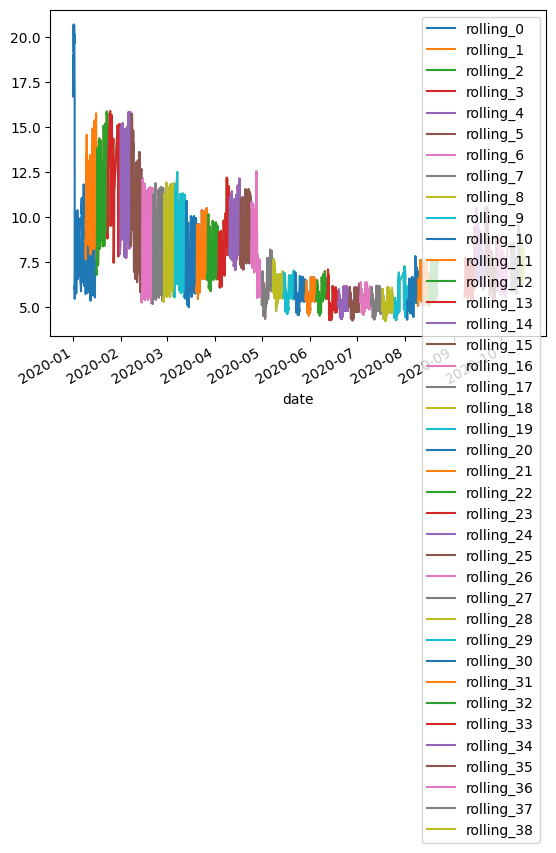

In [39]:
df_dewc1.iloc[:,1:].plot()

In [40]:
df_dewc2, mod_stats=ad.rolling_met(df1, value='PM2.5',feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour'], n_samples=100,window_days=14,rollingevery=7,fraction=0.75, seed=7654321, n_cores=-1)

2024-06-25 14:13:51 : Training AutoML...
2024-06-25 14:14:53 : Best model is xgboost with best model parameters of {'n_estimators': 80, 'max_leaves': 179, 'min_child_weight': 0.03469842703470486, 'learning_rate': 0.09050333780681966, 'subsample': 0.8788794424065157, 'colsample_bylevel': 0.7372635897769984, 'colsample_bytree': 0.9535003009271207, 'reg_alpha': 0.09353166342028453, 'reg_lambda': 3.6044671382295674}
2024-06-25 14:14:53 : Resampling data range from 2020-01-01 to 2020-12-31
Resampling variables: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 100 times...
2024-06-25 14:14:54 : Aggregating 100 predictions...
2024-06-25 14:14:55 : Resampling data range from 2020-01-01 to 2020-01-15
Resampling variables: ['u10', 'v10', 'd2m', 't2m', 'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'] and predicting 100 times...
2024-06-25 14:14:55 : Aggregating 100 predictions...
2024-06-25 14:14:55 : Resampling data range from 2020-01-09 to 2020-01-23
Resampling var

In [41]:
df_dewc2.head()

,observed,normalised,emi_mean_14,emi_std_14,met_short,met_season
date,,,,,,
2020-01-01 00:00:00,58.1,22.440180,NaN,NaN,NaN,NaN
2020-01-01 01:00:00,43.2,24.295465,NaN,NaN,NaN,NaN
2020-01-01 02:00:00,43.0,21.568874,NaN,NaN,NaN,NaN
2020-01-01 03:00:00,42.8,23.703558,NaN,NaN,NaN,NaN
2020-01-01 04:00:00,36.8,22.285439,NaN,NaN,NaN,NaN


<Axes: xlabel='date'>

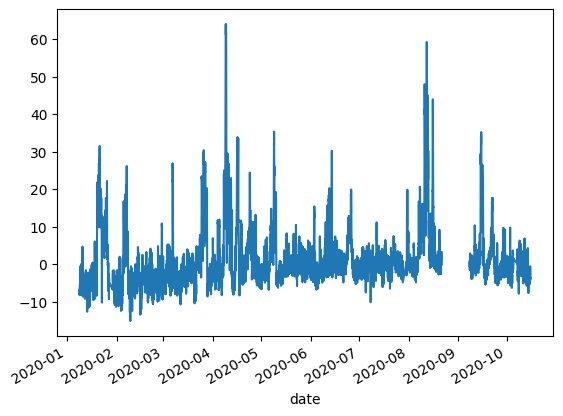

In [42]:
df_dewc2['met_short'].plot()

<Axes: xlabel='date'>

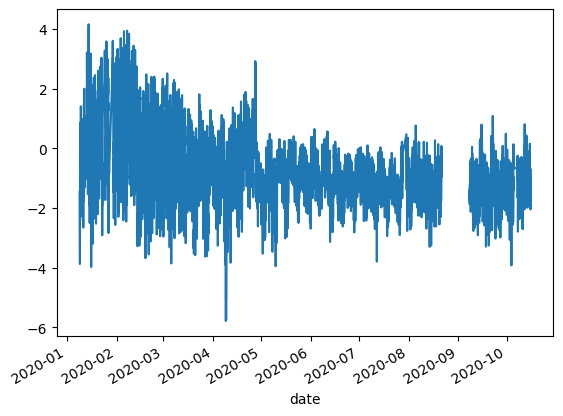

In [43]:
df_dewc2['met_season'].plot()

# Partial Dependence Plots

In [44]:
import normet.pdp as pdp

In [45]:
df1a=ad.prepare_data(df1, value='PM2.5', feature_names=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m'], split_method='random',  fraction=0.75, seed=7654321)

In [46]:
df1a

,rowid,u10,sp,ssrd,value,date,blh,t2m,rh2m,v10,d2m,tcc,tp,date_unix,day_julian,weekday,hour,set
0,0,-2.720528,102252.303312,-1.164153e-10,58.1,2020-01-01 00:00:00,384.209053,278.394725,91.884130,1.545010,277.183465,0.650958,0.000008,1.577837e+09,1,3,0,training
1,1,-2.308789,102211.168636,-1.164153e-10,43.2,2020-01-01 01:00:00,353.220263,277.772899,92.715877,1.282742,276.695430,0.603699,0.000002,1.577840e+09,1,3,1,training
2,2,-2.216471,102174.855967,-1.164153e-10,43.0,2020-01-01 02:00:00,255.911846,277.463419,93.485560,0.758730,276.505662,0.710378,0.000005,1.577844e+09,1,3,2,testing
3,3,-1.928623,102166.786485,-1.164153e-10,42.8,2020-01-01 03:00:00,191.375560,277.305813,93.906363,0.509013,276.412816,0.837765,0.000005,1.577848e+09,1,3,3,training
4,4,-1.700043,102142.578039,-1.164153e-10,36.8,2020-01-01 04:00:00,151.780210,277.478941,93.696878,0.607069,276.553051,0.819103,0.000003,1.577851e+09,1,3,4,testing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6368,6368,1.380939,99902.506413,-5.820766e-11,11.7,2020-12-31 19:00:00,476.945688,273.557442,90.582979,-1.945195,272.197565,0.918149,0.000000,1.609441e+09,366,4,19,training
6369,6369,0.987925,99947.625909,-5.820766e-11,11.0,2020-12-31 20:00:00,486.665851,273.629146,89.939908,-2.102732,272.171041,0.839639,0.000000,1.609445e+09,366,4,20,training
6370,6370,0.681543,100000.215520,-5.820766e-11,15.3,2020-12-31 21:00:00,489.355002,273.470592,90.422188,-1.933668,272.087408,0.739354,0.000000,1.609448e+09,366,4,21,testing
6371,6371,1.020793,100042.844978,-5.820766e-11,17.1,2020-12-31 22:00:00,40.714872,272.926062,95.088677,-0.583816,272.235319,0.643753,0.000000,1.609452e+09,366,4,22,training


In [47]:
all_features=['u10', 'v10', 'd2m', 't2m',
       'blh', 'sp', 'ssrd', 'tcc', 'tp', 'rh2m','date_unix', 'day_julian', 'weekday',
       'hour']
pdp_value=pdp.pdp_all(automl,df1a,feature_names=all_features)

In [48]:
pdp_value

,variable,value,pdp_mean,pdp_std
0,u10,-4.354032,10.963994,7.261466
1,u10,-4.242993,11.043289,7.309947
2,u10,-4.131954,11.042447,7.333392
3,u10,-4.020915,11.031183,7.338155
4,u10,-3.909875,11.040386,7.363017
...,...,...,...,...
1226,hour,19.000000,9.639515,7.460504
1227,hour,20.000000,9.578510,7.448645
1228,hour,21.000000,9.388046,7.372877
1229,hour,22.000000,9.182877,7.346088


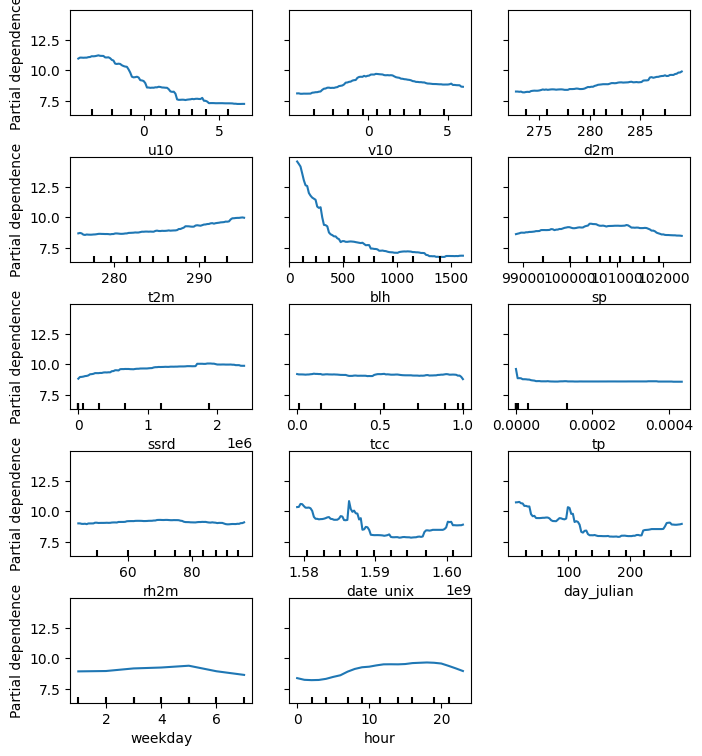

In [49]:
pdp.pdp_plot(automl, df1a, feature_names=all_features,figsize=(8,9),hspace=0.4)

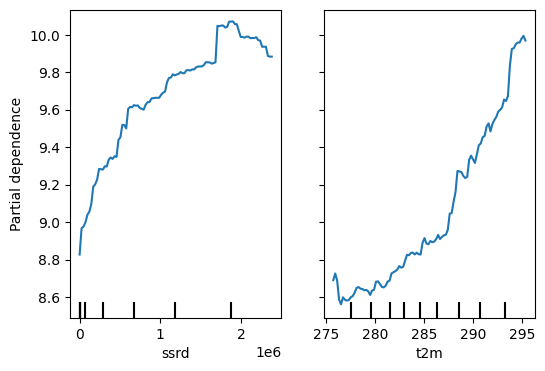

In [50]:
pdp.pdp_plot(automl, df1a, feature_names=all_features,variables=['ssrd','t2m'],kind='average',figsize=(6,4))

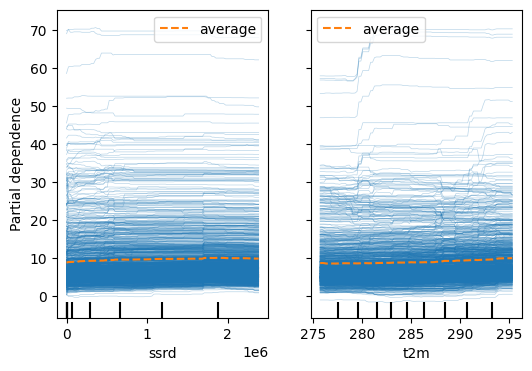

In [51]:
pdp.pdp_plot(automl, df1a, feature_names=all_features,variables=['ssrd','t2m'],kind='both',figsize=(6,4))

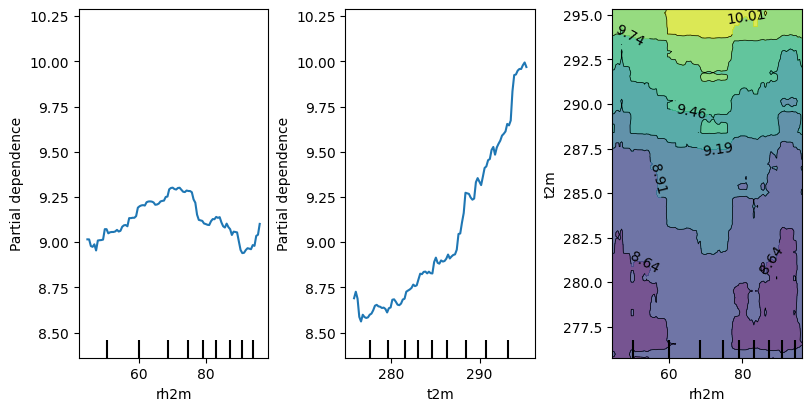

In [52]:
pdp.pdp_interaction(automl,df1a,variables=['rh2m','t2m',('rh2m','t2m')],kind='average',
                training_only=True,ncols=3,figsize=(8,4),constrained_layout=True)

# Change Points Detection

In [53]:
df_dewca.head()

,observed,base,date_unix,day_julian,weekday,hour,deweathered,emi_noise
date,,,,,,,,
2020-01-01 00:00:00,58.1,8.895617,21.030807,1.516623,0.738810,-0.619196,22.435064,-0.231979
2020-01-01 01:00:00,43.2,8.470988,22.039238,1.890915,0.600285,-0.573421,23.300407,-0.656608
2020-01-01 02:00:00,43.0,8.421347,21.423326,1.724953,0.604996,-0.498650,22.548376,-0.706249
2020-01-01 03:00:00,42.8,8.952380,21.334358,1.724001,0.668509,-0.733782,22.817869,-0.175216
2020-01-01 04:00:00,36.8,9.112869,20.735292,1.622902,0.553637,-0.644518,22.252586,-0.014727


In [54]:
import normet.cpd as cpd
import matplotlib.pyplot as plt

In [55]:
pt=cpd.cpd_rupture(df_dewca.resample('1D').mean(),'date_unix',window=14, n=5)

In [56]:
pt

DatetimeIndex(['2020-02-09', '2020-04-04', '2020-04-14', '2020-04-24',
               '2020-05-09'],
              dtype='datetime64[ns]', name='date', freq=None)

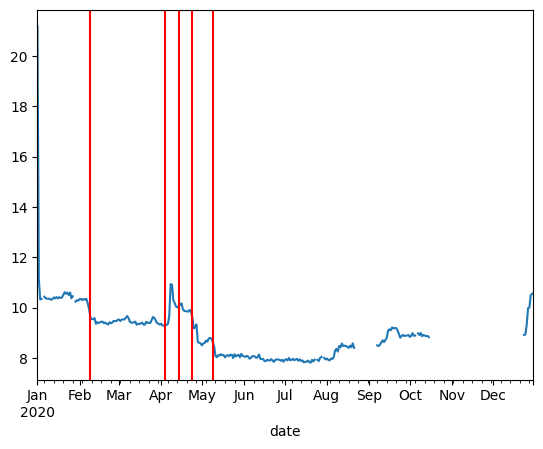

In [57]:
fig,ax=plt.subplots()
df_dewca['date_unix'].resample('1D').mean().plot()
for i in np.arange(len(pt)):
    ax.axvline(pt[i],c='r',label='ruptures')